# Connecting or Mounting the Drive to the Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Unzipping the Dataset Folder

In [2]:
!unzip /content/drive/My\ Drive/Densenet\ Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1091).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1092).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1093).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1094).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1095).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1096).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1097).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1098).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1099).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (11).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (110).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1100).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1101).JPG  
  inflating: Tot

# Loading the Data into System

In [3]:
DATASET_DIR='/content/Total/'


# Glob will be useful for retreiving the internal paths where I have to total of 10 classes which is displayed in the output.
from glob import glob
Tomato_Leaf_Diseases = glob('/content/Total/*')
Tomato_Leaf_Diseases

['/content/Total/Tomato_Late_blight',
 '/content/Total/Tomato_Yellow_Leaf_Curl_Virus',
 '/content/Total/Tomato_Septoria_leaf_spot',
 '/content/Total/Tomato_Target_Spot',
 '/content/Total/Tomato_healthy',
 '/content/Total/Tomato_mosaic_virus',
 '/content/Total/Tomato_Bacterial_spot',
 '/content/Total/Tomato_Early_blight',
 '/content/Total/Tomato_Spider_mites',
 '/content/Total/Tomato_Leaf_Mold']

# Loading the Required Packages for the Model

In [4]:
import os
import cv2
import pickle
import scipy.io
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tqdm import tqdm
from os import listdir
from skimage import data
from skimage.io import imread
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import Adam
from skimage.color import rgb2gray
from keras.utils import plot_model
from keras.preprocessing import image

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping
from os.path import dirname, join as pjoin
from sklearn.metrics import confusion_matrix
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.models import Model,Sequential, Input, load_model
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint
from keras.models import Model,Sequential, Input, load_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis for easy way of understanding the Dense Net Model


In [5]:
#Creating a list for all the classes in the dataset and storing it in the disease types variable

disease_types = ['Tomato_mosaic_virus',
                 'Tomato_Late_blight',
                 'Tomato_Septoria_leaf_spot',
                 'Tomato_Bacterial_spot',
                 'Tomato_Spider_mites',
                 'Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato_Leaf_Mold',
                 'Tomato_Target_Spot',
                 'Tomato_healthy',
                 'Tomato_Early_blight']

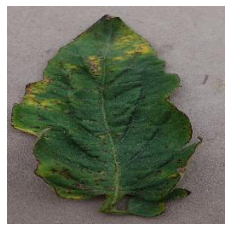

In [6]:
#Reading the Image to present how make sure system understands that the given data is Image Data

from skimage.io import imread
img = imread('/content/Total/Tomato_Bacterial_spot/Tomato_Bacterial_spot (1003).JPG')

plt.imshow(img)
plt.axis('off')
plt.show()

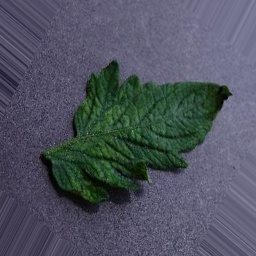

In [7]:
# Other form of reading the image data

from IPython.display import Image, display

Image('/content/Total/Tomato_mosaic_virus/Tomato_mosaic_virus (1005).JPG')

In [8]:
# Creating the List Directory to read all the images in 10 different folders

labels = os.listdir(DATASET_DIR)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(DATASET_DIR):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 10
folder: Tomato_Late_blight images: 1700
folder: Tomato_Yellow_Leaf_Curl_Virus images: 1700
folder: Tomato_Septoria_leaf_spot images: 1700
folder: Tomato_Target_Spot images: 1700
folder: Tomato_healthy images: 1700
folder: Tomato_mosaic_virus images: 1700
folder: Tomato_Bacterial_spot images: 1700
folder: Tomato_Early_blight images: 1700
folder: Tomato_Spider_mites images: 1700
folder: Tomato_Leaf_Mold images: 1700
Total images: 17000


In [9]:
#Printing the tail values which are stored by the system from the dataset

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(DATASET_DIR, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.tail()

,File,DiseaseID,Disease Type
16995,Tomato_Early_blight/Tomato_Early_blight (1428)...,9,Tomato_Early_blight
16996,Tomato_Early_blight/Tomato_Early_blight (203).JPG,9,Tomato_Early_blight
16997,Tomato_Early_blight/Tomato_Early_blight (1621)...,9,Tomato_Early_blight
16998,Tomato_Early_blight/Tomato_Early_blight (681).JPG,9,Tomato_Early_blight
16999,Tomato_Early_blight/Tomato_Early_blight (565).JPG,9,Tomato_Early_blight


In [10]:
# Displaying the head images which are first 5 images reading by the system
# Seed is to randomize the values the value is given as 64 where all the 64 images will be picked by the system randomly out of 10000 images
SEED = 64

train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reseting the indices values
train.head()

,File,DiseaseID,Disease Type
0,Tomato_Late_blight/Tomato_Late_blight (17).JPG,1,Tomato_Late_blight
1,Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...,5,Tomato_Yellow_Leaf_Curl_Virus
2,Tomato_Early_blight/Tomato_Early_blight (677).JPG,9,Tomato_Early_blight
3,Tomato_mosaic_virus/Tomato_mosaic_virus (701).JPG,0,Tomato_mosaic_virus
4,Tomato_Bacterial_spot/Tomato_Bacterial_spot (8...,3,Tomato_Bacterial_spot


In [11]:
# Provides all the information of the Dataset

train.info

<bound method DataFrame.info of                                                     File  ...                   Disease Type
0         Tomato_Late_blight/Tomato_Late_blight (17).JPG  ...             Tomato_Late_blight
1      Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...  ...  Tomato_Yellow_Leaf_Curl_Virus
2      Tomato_Early_blight/Tomato_Early_blight (677).JPG  ...            Tomato_Early_blight
3      Tomato_mosaic_virus/Tomato_mosaic_virus (701).JPG  ...            Tomato_mosaic_virus
4      Tomato_Bacterial_spot/Tomato_Bacterial_spot (8...  ...          Tomato_Bacterial_spot
...                                                  ...  ...                            ...
16995  Tomato_Spider_mites/Tomato_Spider_mites (1505)...  ...            Tomato_Spider_mites
16996  Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...  ...  Tomato_Yellow_Leaf_Curl_Virus
16997  Tomato_Early_blight/Tomato_Early_blight (162).JPG  ...            Tomato_Early_blight
16998   Tomato_Late_blight/Tomato_Late

In [12]:
# Colum variables stored in the Model

train.columns

Index(['File', 'DiseaseID', 'Disease Type'], dtype='object')

In [13]:
# Value count for images with the ID generated by the system along with the number of images in each ID

train['DiseaseID'].value_counts()

9    1700
8    1700
7    1700
6    1700
5    1700
4    1700
3    1700
2    1700
1    1700
0    1700
Name: DiseaseID, dtype: int64

In [14]:
# Value counts for the model with disease name along with the number of diseases

train['Disease Type'].value_counts()

Tomato_Early_blight              1700
Tomato_mosaic_virus              1700
Tomato_Bacterial_spot            1700
Tomato_Target_Spot               1700
Tomato_Leaf_Mold                 1700
Tomato_Late_blight               1700
Tomato_Septoria_leaf_spot        1700
Tomato_healthy                   1700
Tomato_Yellow_Leaf_Curl_Virus    1700
Tomato_Spider_mites              1700
Name: Disease Type, dtype: int64

In [15]:
# Finding the Data Types for the Files

train.dtypes

File            object
DiseaseID        int64
Disease Type    object
dtype: object

In [16]:
# Count for each file in the model 

train.count()

File            17000
DiseaseID       17000
Disease Type    17000
dtype: int64

In [17]:
# Description for the model

train.describe()

,DiseaseID
count,17000.000000
mean,4.500000
std,2.872366
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


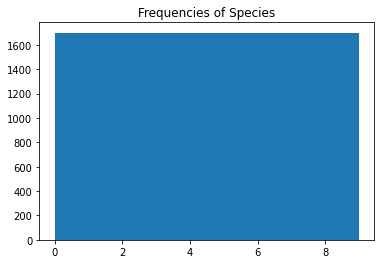

<Figure size 864x864 with 0 Axes>

In [18]:
# Plotting the histogram to make sure of the images in the model

plt.hist(train['DiseaseID'])
plt.title('Frequencies of Species')
plt.figure(figsize=(12, 12))
plt.show()

# Initializing the CNN Model

In [28]:
TRAIN_DIR='/content/Total/'

#Reshaping the images for the better model performance 
IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(TRAIN_DIR, filepath)) # Loading a colored image as a default flag

# Resizing the image to the target size which is given as 64
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [29]:
#To find the shape of the Train Folder in the Dataset 
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
        
# Normalization of the train data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

17000it [00:19, 864.16it/s]


Train Shape: (17000, 64, 64, 3)


In [31]:
Y_train = train['DiseaseID'].values
print('Before shape value:',Y_train.shape)

Y_train = to_categorical(Y_train, num_classes=10)
print('shape value after adding the classes:',Y_train.shape)

Before shape value: (17000,)
shape value after adding the classes: (17000, 10)


# Data Augmentation

In [32]:
#This helps in increasing the data
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

# Splitting the data for training and Testing purpose

In [33]:
BATCH_SIZE = 64
 
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

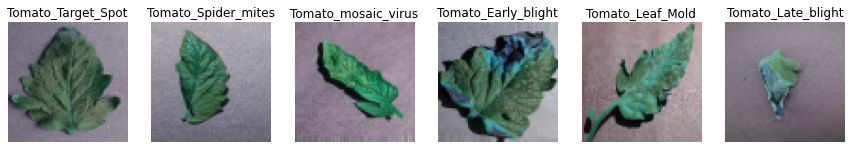

In [34]:
fig, ax = plt.subplots(1, 6, figsize=(15, 15))
for i in range(6):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [35]:
EPOCHS = 50
N_ch=3
INIT_LR = 1e-3

width=64
height=64
depth=3

In [36]:
# CNN Model is created  using 5 COnv Layers along with some activation fucntions

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
    
model.add(Conv2D(64, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [37]:
# Compilation of the model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

# train the network
print("[INFO] training network...")

[INFO] training network...


# Fitting the Model

In [39]:
# Fits the model on batches with real-time data augmentation
#It took around 20 Min to complete all the 50 Epochs

hist = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50

Epoch 00001: val_loss did not improve from 0.01955
212/212 - 4s - loss: 0.0105 - accuracy: 0.9821 - val_loss: 0.8323 - val_accuracy: 0.5815
Epoch 2/50

Epoch 00002: val_loss did not improve from 0.01955
212/212 - 4s - loss: 0.0112 - accuracy: 0.9803 - val_loss: 0.0200 - val_accuracy: 0.9715
Epoch 3/50

Epoch 00003: val_loss did not improve from 0.01955
212/212 - 4s - loss: 0.0101 - accuracy: 0.9822 - val_loss: 0.5209 - val_accuracy: 0.6703
Epoch 4/50

Epoch 00004: val_loss did not improve from 0.01955
212/212 - 4s - loss: 0.0109 - accuracy: 0.9806 - val_loss: 0.1520 - val_accuracy: 0.8450
Epoch 5/50

Epoch 00005: val_loss did not improve from 0.01955
212/212 - 4s - loss: 0.0110 - accuracy: 0.9812 - val_loss: 0.0343 - val_accuracy: 0.9582
Epoch 6/50

Epoch 00006: val_loss did not improve from 0.01955
212/212 - 4s - loss: 0.0115 - accuracy: 0.9808 - val_loss: 0.0736 - val_accuracy: 0.9238
Epoch 7/50

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00007

In [40]:
#Calculating the Model Accuracy

final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

107/107 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9294
Final Loss: 0.06778933852910995, Final Accuracy: 0.929411768913269


#Model Accuary and Loss

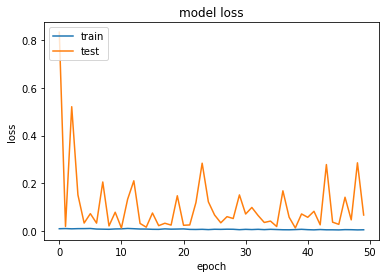

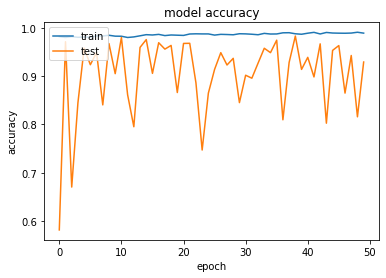

In [41]:
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model.save("CNN.h5")

# Predicting the Tomato Leaf Disease

[0.01434271 0.06368044 0.17183821 0.22479928 0.0107968  0.09156863
 0.06051534 0.09269886 0.03004459 0.23971517]


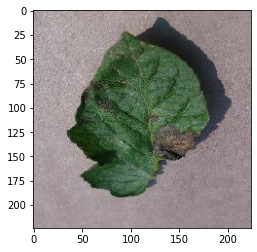

Prediction: Tomato_Early_blight


In [ ]:
from skimage import io
from keras.preprocessing import image

disease_types = ['Tomato_mosaic_virus',
                 'Tomato_Late_blight',
                 'Tomato_Septoria_leaf_spot',
                 'Tomato_Bacterial_spot',
                 'Tomato_Spider_mites',
                 'Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato_Leaf_Mold',
                 'Tomato_Target_Spot',
                 'Tomato_healthy',
                 'Tomato_Early_blight']

img = image.load_img('/content/Total/Tomato_Early_blight/Tomato_Early_blight (1086).JPG')
show_img=image.load_img('/content/Total/Tomato_Early_blight/Tomato_Early_blight (1086).JPG', grayscale=False, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
#x = np.array(x, 'float32')
x /= 255

disease = model.predict(x)
print(disease[0])

plt.imshow(show_img)
plt.show()

a=disease[0]
ind=np.argmax(a)
        
print('Prediction:',disease_types[ind])

#Plotting the Model

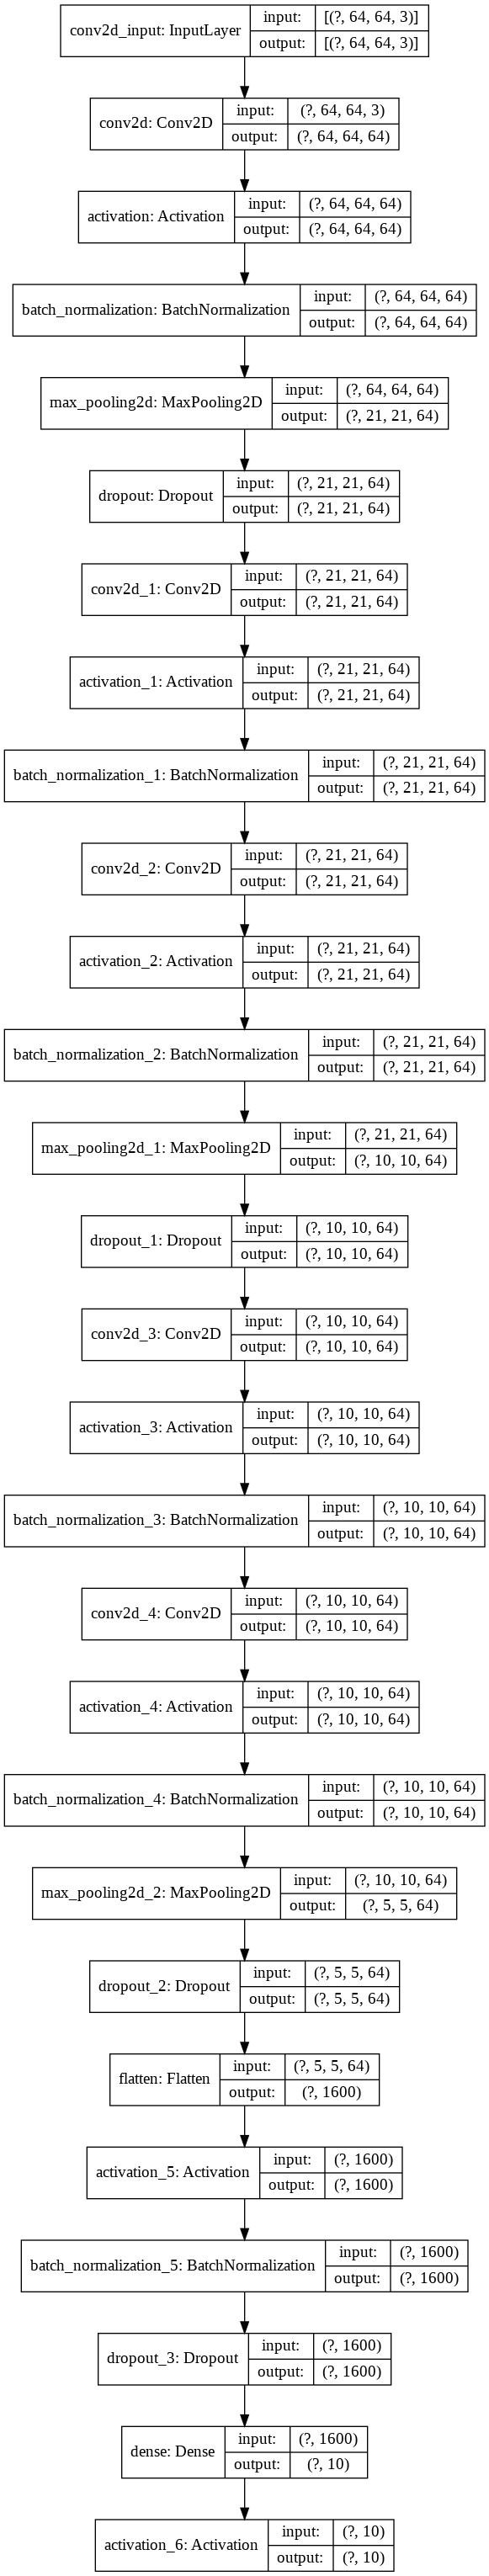

In [43]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', expand_nested=True)

# Evaluation Matrics

Text(0.5, 144.41374999999996, 'Predicted')

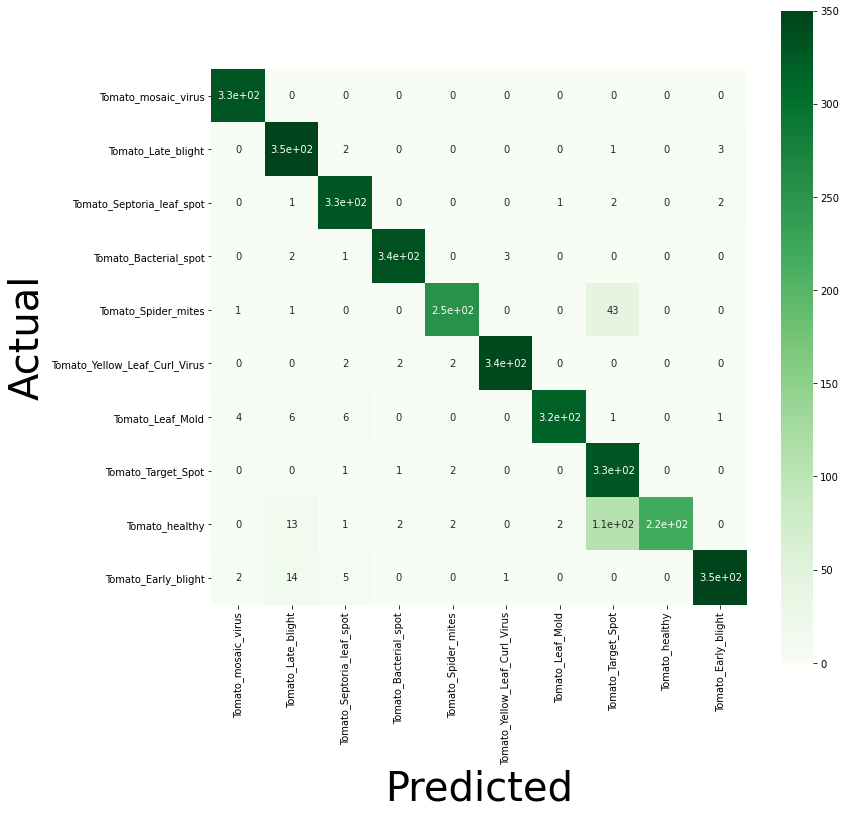

In [44]:
Y_pred = model.predict(X_val)
Y_pred = np.argmax(Y_pred, axis=1)

Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [45]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

print ("Accuracy : ", metrics.accuracy_score(Y_true, Y_pred)*100)

Accuracy :  92.94117647058823


In [46]:
# Precision
from sklearn.metrics import precision_score

precision_score(Y_true, Y_pred, average=None)

array([0.97935103, 0.90414508, 0.9481268 , 0.98529412, 0.97692308,
       0.98850575, 0.99065421, 0.68115942, 1.        , 0.98314607])

In [47]:
# Recall

from sklearn.metrics import recall_score
recall_score(Y_true, Y_pred, average=None)

array([1.        , 0.98309859, 0.98208955, 0.98240469, 0.84949833,
       0.98285714, 0.94642857, 0.98798799, 0.63400576, 0.94086022])

In [48]:
# F1_score
from sklearn.metrics import f1_score

f1_score(Y_true, Y_pred, average=None)

array([0.98956781, 0.94197031, 0.96480938, 0.98384728, 0.90876565,
       0.98567335, 0.96803653, 0.80637255, 0.77601411, 0.96153846])

In [49]:
from sklearn.metrics import r2_score

r2_score(Y_true, Y_pred)

0.8779433991404832

In [50]:
#MAE L1 loss function - Should be close to 0

from sklearn.metrics import mean_absolute_error  
mean_absolute_error(Y_true, Y_pred)

0.20941176470588235

In [51]:
#MAE L2 loss function - Should be close to 0

from sklearn.metrics import mean_squared_error  
mean_squared_error(Y_true, Y_pred)

1.0305882352941176

In [52]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       332
           1       0.90      0.98      0.94       355
           2       0.95      0.98      0.96       335
           3       0.99      0.98      0.98       341
           4       0.98      0.85      0.91       299
           5       0.99      0.98      0.99       350
           6       0.99      0.95      0.97       336
           7       0.68      0.99      0.81       333
           8       1.00      0.63      0.78       347
           9       0.98      0.94      0.96       372

    accuracy                           0.93      3400
   macro avg       0.94      0.93      0.93      3400
weighted avg       0.94      0.93      0.93      3400



# Thank You